Lets fixed $\Lambda = 4,5$

In [1]:
using IntervalArithmetic

In [2]:
Λ = Interval(4.5)

[4.5, 4.5]

In [3]:
α = Λ/(Λ-1)

[1.28571, 1.28572]

In [4]:
K = Int64(floor(mid(Λ)))

4

In [5]:
q_K_k(k) = max(0, 0.5*((Λ-1-k)/(Λ-1)))

q_K_k (generic function with 1 method)

In [6]:
F(k) = x -> x + α*(k-(k^2-(k/α)*(k+1-2*x))^(0.5))

F (generic function with 1 method)

Finding the branch intervals.

In [7]:
[q_K_k(i) for i in 1:K]

4-element Vector{Interval{Float64}}:
     [0.357142, 0.357143]
     [0.214285, 0.214286]
     [0.0714285, 0.0714286]
 [0, 0]

In [8]:
using Plots

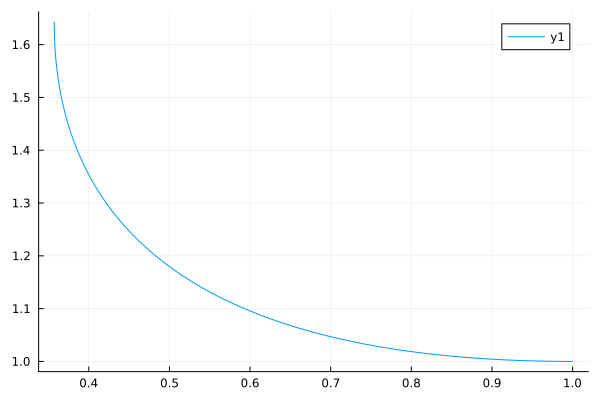

In [9]:
f1 = F(1)
plot(x->mid(f1(x),1), (2.5/7), 1)

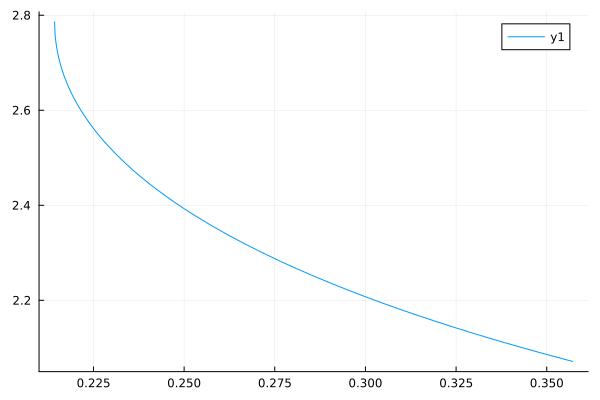

In [10]:
f2 = F(2)
plot(x->mid(f2(x),1), (1.5/7), (2.5/7))

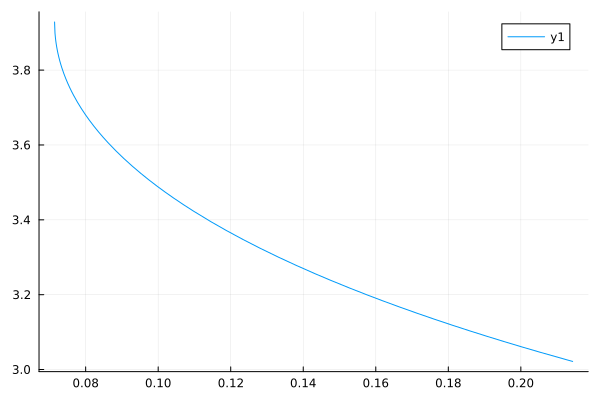

In [11]:
f3 = F(3)
plot(x->mid(f3(x),1), (0.5/7), (1.5/7))

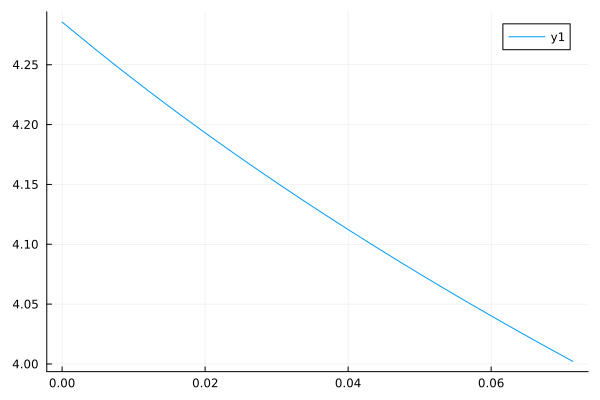

In [12]:
f4 = F(4)
plot(x->mid(f4(x),1), 0, (0.5/7))

In [13]:
using RigorousInvariantMeasures

In [15]:
D = PwMap([x->f4(x)-4.0;x->f3(x)-3.0;x->f2(x)-2.0; x->f1(x)-1.0], [Interval(0), Interval(0.5/7),Interval(1.5/7),Interval(2.5/7), Interval(1)])

Piecewise-defined dynamic with 4 branches

In [16]:
B = Ulam(1024)

Ulam{LinRange{Float64, Int64}}(LinRange{Float64}(0.0, 1.0, 1025))

In [17]:
Q = DiscretizedOperator(B, D)

┌ Info: Assembling operator, the Newton stopping options are 
│ 			ϵ = 1.0e-14, max_iter = 100
└ @ RigorousInvariantMeasures /home/mutare/.julia/packages/RigorousInvariantMeasures/jSNyj/src/GenericAssembler.jl:102
Computing preimages... 100%|█████████████████████████████| Time: 0:00:14


IntegralPreservingDiscretizedOperator{SparseArrays.SparseMatrixCSC{Interval{Float64}, Int64}}(sparse([288, 289, 290, 291, 292, 293, 283, 284, 285, 286  …  349, 350, 351, 352, 353, 354, 355, 356, 357, 358], [1, 1, 1, 1, 1, 1, 2, 2, 2, 2  …  1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024], Interval{Float64}[[0.0822814, 0.0822815], [0.201338, 0.201339], [0.201009, 0.20101], [0.20068, 0.200681], [0.200351, 0.200352], [0.114339, 0.11434], [0.0706446, 0.0706447], [0.202987, 0.202988], [0.202657, 0.202658], [0.202327, 0.202328]  …  [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1]], 1024, 1024))

In [18]:
Q.L

1024×1024 SparseArrays.SparseMatrixCSC{Interval{Float64}, Int64} with 231894 stored entries:
⠀⠀⢸⠁⠀⠀⠀⠀⣠⠀⠀⠀⠀⠀⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⠀⢀⡏⠀⠀⠀⠀⢠⠇⠀⠀⠀⠀⢀⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⠀⣸⠀⠀⠀⠀⠀⡞⠀⠀⠀⠀⠀⡞⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⢀⡇⠀⠀⠀⠀⢸⠁⠀⠀⠀⠀⡼⠁⠀⢸⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⢸⠀⠀⠀⠀⢀⡏⠀⠀⠀⠀⢰⠃⠀⠀⢸⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⡏⠀⠀⠀⠀⢸⠀⠀⠀⠀⢀⡏⠀⠀⠀⢸⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⠀⠀⠀⠀⠀⡏⠀⠀⠀⠀⣸⠀⠀⠀⠀⢸⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⠀⠀⠀⠀⢸⠁⠀⠀⠀⠀⡇⠀⠀⠀⠀⢸⠉⠉⠉⠉⠉⠉⠉⠉⠉⠉⠉⠉⠉⠉⠉⠉⠉⠉⠉⠉⠉⠉⠉⠉
⠀⠀⠀⠀⡼⠀⠀⠀⠀⢸⠁⠀⠀⠀⠀⡏⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⡇⠀⠀⠀⠀⡼⠀⠀⠀⠀⢸⠁⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⢰⠃⠀⠀⠀⠀⡇⠀⠀⠀⠀⣸⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⢸⠀⠀⠀⠀⢀⡇⠀⠀⠀⠀⡇⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⣸⠀⠀⠀⠀⢸⠀⠀⠀⠀⠀⡇⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⡇⠀⠀⠀⠀⢸⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⡇⠀⠀⠀⠀⢸⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⡇⠀⠀⠀⠀⠸⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⡇⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⡇⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠃⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀

In [19]:
E = D ∘ D

RigorousInvariantMeasures.ComposedDynamic((Piecewise-defined dynamic with 4 branches, Piecewise-defined dynamic with 4 branches), Piecewise-defined dynamic with 15 branches)

In [20]:
Q = DiscretizedOperator(B, E)

┌ Info: Assembling operator, the Newton stopping options are 
│ 			ϵ = 1.0e-14, max_iter = 100
└ @ RigorousInvariantMeasures /home/mutare/.julia/packages/RigorousInvariantMeasures/jSNyj/src/GenericAssembler.jl:102
Computing preimages... 100%|█████████████████████████████| Time: 0:00:42


IntegralPreservingDiscretizedOperator{SparseArrays.SparseMatrixCSC{Interval{Float64}, Int64}}(sparse([258, 259, 260, 261, 262, 263, 264, 265, 266, 267  …  942, 943, 944, 945, 946, 947, 948, 949, 950, 951], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1  …  1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024], Interval{Float64}[[0.0568966, 0.0568967], [0.0614804, 0.0614805], [0.0613417, 0.0613418], [0.061203, 0.0612031], [0.0610644, 0.0610645], [0.0609259, 0.060926], [0.0607874, 0.0607875], [0.0606491, 0.0606492], [0.0605108, 0.0605109], [0.0603726, 0.0603727]  …  [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1]], 1024, 1024))

In [21]:
Q.L

1024×1024 SparseArrays.SparseMatrixCSC{Interval{Float64}, Int64} with 655111 stored entries:
⢠⠀⡇⣿⣿⠀⡄⠀⣿⣿⡇⠠⡄⠀⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⠸⡄⢧⣿⣿⡄⢳⠀⣿⣿⣇⠀⡇⠀⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⠀⡇⢸⣿⣿⡇⢸⠀⢿⣿⣿⠀⢧⠀⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⠀⡇⢸⣿⣿⡇⢸⠀⢸⣿⣿⠀⢸⠀⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⠀⡇⢸⣿⣿⢹⠘⡆⢸⣿⡟⡆⢸⡀⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⡇⢹⠈⡏⠉⢸⠀⡇⢸⠉⠁⡇⠀⡇⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⡇⢸⠀⣷⣶⢸⠀⡇⢸⣤⡄⡇⠀⡇⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⢧⢸⠀⠉⢹⢸⠀⡇⠈⠉⡇⢧⠀⢧⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⢸⢸⠀⠀⢸⠈⡇⢳⠀⠀⡇⢸⠀⢸⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⢸⢸⠀⠀⢸⠀⡇⢸⠀⠀⡇⢸⠀⢸⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⢸⠸⡄⠀⢸⠀⡇⢸⠀⠀⡇⢸⠀⢸⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⢸⠀⡇⠀⠘⡆⡇⢸⠀⠀⡇⢸⠀⠸⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⢸⠀⡇⠀⠀⡇⡇⢸⠀⠀⡇⢸⠀⠀⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⢸⠀⡇⠀⠀⠀⡇⢸⠀⠀⠀⢸⠀⠀⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⢸⠀⡇⠀⠀⠀⡇⢸⠀⠀⠀⢸⠀⠀⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⠸⠀⡇⠀⠀⠀⠇⢸⠀⠀⠀⠸⠀⠀⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⠀⠀⡇⠀⠀⠀⠀⢸⠀⠀⠀⠀⠀⠀⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⠀⠀⡇⠀⠀⠀⠀⠈⡇⠀⠀⠀⠀⠀⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⠀⠀⠃⠀⠀⠀⠀⠀⠃⠀⠀⠀⠀⠀⠛⠛⠛⠛⠛⠛⠛⠛⠛⠛⠛⠛⠛⠛⠛⠛⠛⠛⠛⠛⠛⠛⠛⠛⠛⠛
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀